In [1]:
# import sys
#!{sys.executable} -m pip install -r requirements.txt

## Haassomeapitools tutoriall with examples.

API built into Haas is very powerful on its own, and when combined with Python, Haas can autonomously do alot of work for us in the background.

In this tutorial you will learn to:
..*list your bots and config files as dropdown menu
..*load bot configs from csv files to dataframe


## Introduction

### Haas Setup

You must manually type Local API address, port and key and hit save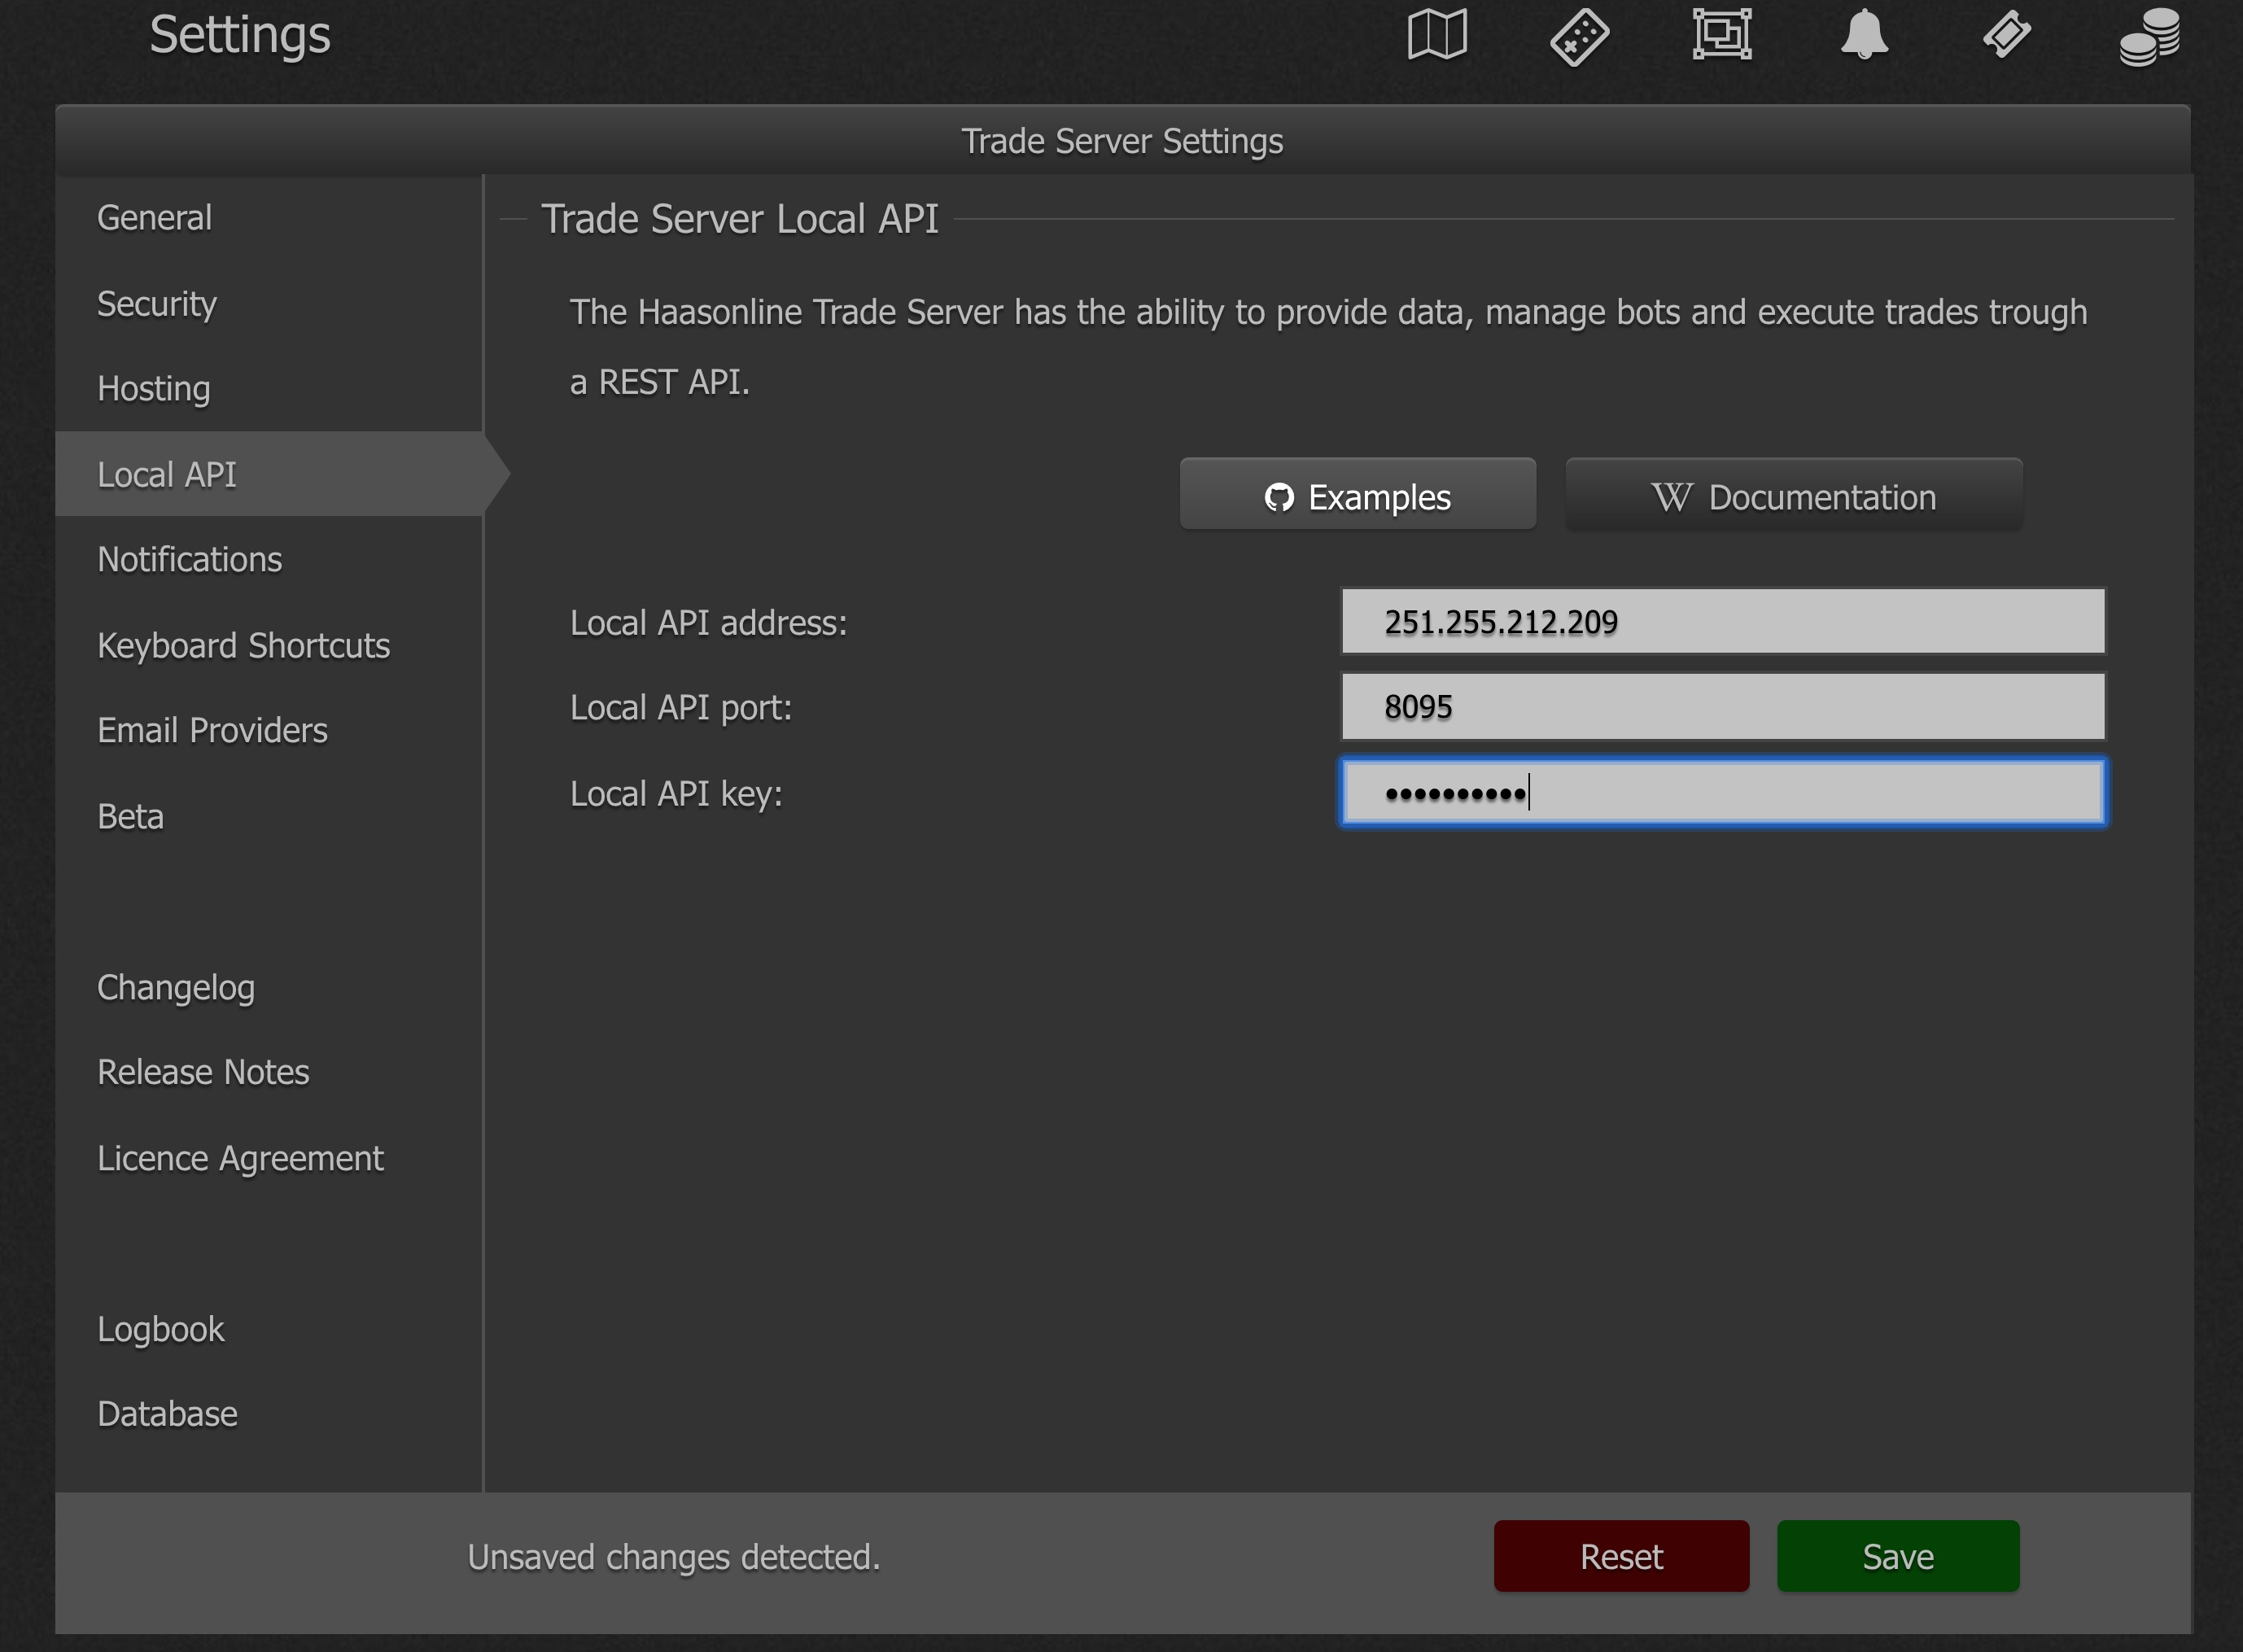

More on LocalAPI Setup can be found here: https://help.haasonline.com/api/getting-started/using-local-api-server

First thing we do is import configserver module that saves our api data into a config file and HaasomeClient class as the means of communication with Haas through API### Auth

In [2]:
import configserver
from haasomeapi.HaasomeClient import HaasomeClient
import os
import pandas as pd
import ipywidgets as widgets

Now lets create our first class and call it BotDB like so:

In [3]:

class BotDB:
	def __init__(self):
		self.c = self.cnt()

	def cnt(self):
		ip, secret = configserver.validateserverdata()
		haasomeClient = HaasomeClient(ip, secret)
		return haasomeClient
'''
BotDB class contains a variable self.c and in it, cnt function returns our api client object which can be used to interact with Bot, Market and Trades data, to place and cancel orders, to clone bots, setup custombots and trade bots: setup/add/remove indicators/safeties/insurances with trade bots.
Backtesting can also be done through api.
'''

### Mad Hatter Bot
'''
In this tutorial we will concentrate only on Mad-Hatter Bot interactions. With HaasomeAPI its possible to load csv file full of mad-hatter cofiguration files and iterate over them, logging backtesting results. in order to load csv we will use pandas. So lets import it
'''
class BotDB(BotDB):
    def csv_to_sellectionbox(self):
        files = self.get_csv_files()
        
        return files
           
    

But before we can read CSV, access to it is needed and to do that we will use OS library

In [4]:

class BotDB(BotDB):
    def get_csv_files(self):
        files =[]
        for file in os.listdir('./'):
            if file.endswith(".csv"):
                files.append(os.path.join('./', file))
       
        
        return files


In [5]:

class BotDB(BotDB):
    def select_from_list(self,files):
        for i, file in enumerate(files):
                    print(i, file)
        userinput = input('Type file number to select it:  ')
        self.db_file = files[int(userinput)]
        return files[int(userinput)]

In [6]:
import csv
db = BotDB()
files = db.get_csv_files()
# print(files[6])
filessellector = widgets.Dropdown(
        options=[x for x in files],
        value=files[2],
        description='Configs',
        disabled=False,
    )


lets  load MH-Bot configs from csv into a dropdown menu

In [7]:
display(filessellector) 


Dropdown(description='Configs', index=2, options=('./bots300.csv', './bots100.csv', './bots500.csv', './bots70…

Reading configs into dataframe is very yeasy and takes just one line of code.

In [8]:


configs = pd.read_csv(filessellector.value) # This is how we turn CSV file from previous step into a DataFrame.
configs.head() # prints Dataframe Head

,interval,signalconsensus,fcc,resetmiddle,allowmidsells,matype,rsil,rsib,rsis,bbl,devup,devdn,macdfast,macdslow,macdsign,trades,roi
0,5,False,False,False,False,1,5,41.0,78.0,12,1.9,2.5,12,26,9,NaN,NaN
1,5,False,False,True,False,1,6,39.0,71.0,50,2.3,1.0,14,38,8,NaN,NaN
2,6,False,False,False,False,5,3,51.0,71.0,8,2.1,1.8,20,120,2,NaN,NaN
3,5,False,False,True,False,7,17,35.0,62.0,31,1.0,1.0,11,18,4,NaN,NaN
4,5,False,False,False,False,7,7,21.0,75.0,25,2.0,1.1,12,24,2,NaN,NaN


Next step is to get ourselves a bot selected. To do that - importing BotSellector class

In [9]:
from  botsellector import BotSellector


class BotDB(BotDB): #new class to retrive bots
    def get_mh_bots(self):
        all_bots = BotSellector().get_all_custom_bots() #getting all bots here
        all_mh_bots = [x for x in all_bots if x.botType == 15] #sorting them to only Mad Hatter Bot(bot type 15 )
        opts= [[x.name,x] for x in all_mh_bots] #making botlist with names
        return opts
    
opts= BotDB().get_mh_bots() #got the list
botsellector = widgets.Dropdown(#Making dropdown out of it
    options=opts,
    value=opts[0][1],
    description='Botlist',
    disabled=False,
)
display(botsellector) #displaying dropdown list here
        

Dropdown(description='Botlist', options=(['ex', <haasomeapi.dataobjects.custombots.BaseCustomBot.BaseCustomBot…

Lets select a bot from list, and below print it's name to confirm.

In [10]:
print(F"'{botsellector.value.name}' is now selected"), 

'ex' is now selected


(None,)

###### And here is a little surprize:15 % discount on Haasonline ONLY by buying Haas using [this link](https://www.haasonline.com/?ref=405) AND (!) the discount code" COSMICBOTS".


Mad-Hatter bot has 3 indicators at it's core. Lets write a function to set their parameters.

In [11]:
from haasomeapi.enums.EnumMadHatterIndicators import EnumMadHatterIndicators
from haasomeapi.enums.EnumMadHatterSafeties import EnumMadHatterSafeties

class BotDB(BotDB):
    

    def setup_bot(self,bot,config): #calling it setup_bot. It checks each parameter against new config.
        try:
            if bot.bBands["Length"] != config['bbl']: #if params differ - applies new one.
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter( #this way less api calls is being made
                bot.guid,
                EnumMadHatterIndicators.BBANDS,
                0,
                    config['bbl']
            )

            if bot.bBands["Devup"] != config['devup']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                    bot.guid,
                    EnumMadHatterIndicators.BBANDS,
                    1,
                    config['devup'],
                )


            if bot.bBands["Devdn"] != config['devdn']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.BBANDS,
                2,
                config['devdn'],
                )


            if bot.bBands["MaType"] != config['matype']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.BBANDS,
                3,
                config['matype'],
                )


            if bot.bBands["AllowMidSell"] != config['allowmidsells']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.BBANDS,
                5,
                config['allowmidsells'],
                )


            if bot.bBands["RequireFcc"] != config['fcc']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.BBANDS,
                6,
                config['fcc'],
                )


            if bot.rsi["RsiLength"] != config['rsil']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.RSI,
                0,
                config['rsil'],
                )


            if bot.rsi["RsiOverbought"] != config['rsib']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.RSI,
                1,
                config['rsib'],
                )


            if bot.rsi["RsiOversold"] != config['rsis']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.RSI,
                2,
                config['rsis'],           )


            if bot.macd["MacdFast"] != config['macdfast']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.MACD,
                0,
                config['macdfast'],
                )

            if bot.macd["MacdSlow"] != config['macdslow']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.MACD,
                1,
                config['macdslow'],
                )


            if bot.macd["MacdSign"] != config['macdsign']:
                do = self.c.customBotApi.set_mad_hatter_indicator_parameter(
                bot.guid,
                EnumMadHatterIndicators.MACD,
                2,
                config['macdsign'],
                )
        
                                                                        #Indicator parameters have been set


            if bot.interval != config['interval']:
                setup_bot = self.c.customBotApi.setup_mad_hatter_bot( # This code sets time interval as main goalj
                botName = bot.name,
                botGuid=bot.guid,
                accountGuid=bot.accountId,
                primaryCoin=bot.priceMarket.primaryCurrency,
                secondaryCoin=bot.priceMarket.secondaryCurrency,
                contractName=bot.priceMarket.contractName,
                leverage=bot.leverage,
                templateGuid=bot.customTemplate,
                position=bot.coinPosition,
                fee=bot.currentFeePercentage,
                tradeAmountType=bot.amountType,
                tradeAmount=bot.currentTradeAmount,
                useconsensus=bot.useTwoSignals,
                disableAfterStopLoss=bot.disableAfterStopLoss,
                interval=config['interval'],
                includeIncompleteInterval=bot.includeIncompleteInterval,
                mappedBuySignal=bot.mappedBuySignal,
                mappedSellSignal=bot.mappedSellSignal,).result


            print(bot.name,' Has been configured')
        except KeyError:
            pass
                                                                # And here we set bot's safeties.
    def set_safety_parameters(newbot, example_bot):
        sellStep = self.c.customBotApi.set_mad_hatter_safety_parameter(
            newbot.guid, EnumMadHatterSafeties.PRICE_CHANGE_TO_SELL, example_bot.priceChangeToSell)
        print(sellStep.errorCode,sellStep.errorMessage)
        buyStep = self.c.customBotApi.set_mad_hatter_safety_parameter(
            newbot.guid, EnumMadHatterSafeties.PRICE_CHANGE_TO_BUY, example_bot.priceChangeToBuy)
        print(buyStep.errorCode,buyStep.errorMessage)
        stopLoss = self.c.customBotApi.set_mad_hatter_safety_parameter(
            newbot.guid, EnumMadHatterSafeties.STOP_LOSS, example_bot.stopLoss)
        print(stopLoss.errorCode,stopLoss.errorMessage)

In [12]:
display(filessellector), display(botsellector)

Dropdown(description='Configs', index=2, options=('./bots300.csv', './bots100.csv', './bots500.csv', './bots70…

Dropdown(description='Botlist', options=(['ex', <haasomeapi.dataobjects.custombots.BaseCustomBot.BaseCustomBot…

(None, None)

In [13]:
bot=botsellector.value


import ipywidgets as widgets
import dateutil.relativedelta
from ipywidgets import interact, interact_manual
import datetime



def calculate_ticks(start_date,end_date):
    diff = end_date-start_date
    secs = diff.total_seconds()/60
    return int(secs)
# Create interactive version of function with DatePickers
ticks = interact(calculate_ticks,
        start_date=widgets.DatePicker(value=(datetime.date.today() + dateutil.relativedelta.relativedelta(days=-1))),
        end_date=widgets.DatePicker(value=datetime.date.today()))
depth = ticks.widget.result

interactive(children=(DatePicker(value=datetime.date(2020, 5, 12), description='start_date'), DatePicker(value…

In [14]:
def bt_bot(bot):
    bdb = BotDB()
    bt = bdb.c.customBotApi.backtest_custom_bot_on_market(
                bot.accountId,
                bot.guid,
                int(depth),
                bot.priceMarket.primaryCurrency,
                bot.priceMarket.secondaryCurrency,
                bot.priceMarket.contractName)
    #     print(bt.errorCode)
    print(bt.result.roi)
    return bt

def iterate(configs,bot):
    bdb = BotDB()
    for i in configs.index:
        config = configs.iloc[i]
        bdb.setup_bot(bot,config)
        print(config)
        print(bot)
        bt = bdb.c.customBotApi.backtest_custom_bot_on_market(
                bot.accountId,
                bot.guid,
                int(depth),
                bot.priceMarket.primaryCurrency,
                bot.priceMarket.secondaryCurrency,
                bot.priceMarket.contractName)
        configs['roi'] = bt.result.roi
        configs['botobject'] = bt.result
    return configs

In [15]:
# results = iterate(configs,bot)

output1 = widgets.Output()
def on_roi_change(change):
    with output1:
        output1.clear_output()
        print('Better ROI:',bot.roi)
# results.observe(on_roi_change, names='roi')

In [16]:
output1 = widgets.Output()

In [17]:
#Save market data to CSV

##For some applications we may need to store market data as a CSV file. Well, here is an example of how it can be done.
ticks.widget

interactive(children=(DatePicker(value=datetime.date(2020, 5, 12), description='start_date'), DatePicker(value…

In [18]:
#Saving market_data to CSV
from MarketDataClass import MarketData
def market_data_to_csv():
    md = MarketData()
    all_markets = md.get_all_markets()
    depth = ticks.widget.result
    undone = []
    for i in all_markets.index:
        mard = all_markets.loc[i]
        priceobj = md.return_priceMarket_object(
            mard.pricesource, mard.primarycurrency, mard.secondarycurrency)['obj'].values[0]
    #     print(priceobj['obj'].values[0])
        market_data = md.get_market_data(priceobj,1,depth)
        if len(market_data)<1:
            undone.append(priceobj)
            print('no data yet')
        else:
            csv = md.save_market_data_to_csv(market_data,priceobj)

        if len(undone)>0:
            market_data = md.get_market_data(priceobj,1,depth)
            if len(market_data)<depth:
                undone.append(priceobj)
            else:
                csv = md.save_market_data_to_csv(market_data,priceobj)


            

In [19]:
#Streaming orderbook data for all markets connected to the system
    
from MarketDataClass import MarketData
def save_all_marketss_data_to_csv():
    md = MarketData()
    market_objects = md.get_all_markets()
    print(market_objects)
    orderbooks = md.all_markets_orderbook(market_objects)
    print(orderbooks)

In [20]:
def sliders_one_param(bot):
    def rsi_sliders(bot):
    #         print(bot.rsi['RsiLength'])
            a = widgets.IntSlider(description='Length',min=2, max=500, step=1, value=bot.rsi['RsiLength'])
            b = widgets.IntSlider(description='Buy',min=2, max=100, step=1, value=bot.rsi['RsiOverbought'])
            c = widgets.IntSlider(description='Sell',min=2, max=100, step=1, value=bot.rsi['RsiOversold'])
            return a,b,c
    a,b,c = rsi_sliders(bot)
    def rsi_indicator_sliders(a, b, c):
            return a, b, c

    ui = widgets.VBox((rsi_sliders(bot)))
    out = widgets.interactive_output(rsi_indicator_sliders, {'a': a, 'b': b, 'c': c})
    display(ui, out)


def range_sliders(bot):
    length = [x for x in range(2,41)]
    lvls = [x for x in range(2,100)]
    lvls2 = [x for x in range(2,100)]


    l = widgets.SelectionRangeSlider(
        options=length,
        index=(2, 5),
        description=' Length',
        disabled=False,
    )
    b = widgets.SelectionRangeSlider(
        options=lvls,
        index=(2, 15),
        description='Buy',
        disabled=False
    )
    s = widgets.SelectionRangeSlider(
        options=lvls2,
        index=(80, 95),
        description='Sell',
        disabled=False
    )
    return l,b,s

l,b,s = range_sliders(bot)

def rsi_indicator_slider(l,b,s):
    return l,b,s


def total_count(l,b,s):
    total = (l.index[1]-l.index[0])*(b.index[1]-b.index[0])*(s.index[1]-s.index[0])
#     print(total)
    return total

ui2 = widgets.VBox(rsi_indicator_slider(l,b,s))

out2 = widgets.interactive_output(rsi_indicator_slider, {'l':l,'b':b,'s':s})

out3 = widgets.Output()





In [21]:
def on_val_change(change):
    with out3:
        out3.clear_output()
        total = total_count(l,b,s)
        print(total,' total backtesting variants',)
        
        
l.observe(on_val_change, names='index')
b.observe(on_val_change, names='index')
s.observe(on_val_change, names='index')
display(ui2,out2,out3)


Output()

Output()

In [22]:
import itertools


def get_all_combos(a, b, c):
    print(a,b,c)
    a = list(range(a.index[0], a.index[1]))
    b = list(range(b.index[0], b.index[1]))
    c = list(range(c.index[0], c.index[1]))
    d = a, b, c
    al = list(itertools.product(*d))
    return al


combos = get_all_combos(l, b, s)
print(len(combos))


SelectionRangeSlider(description=' Length', index=(2, 5), options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40), value=(4, 7)) SelectionRangeSlider(description='Buy', index=(2, 15), options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99), value=(4, 17)) SelectionRangeSlider(description='Sell', index=(80, 95), options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 

In [ ]:
from MadHatterBotClass import MadHatterBot


def backtest_combos(bot,combos):
    mh = MadHatterBot()
    confdf = mh.bot_config(bot)
    
    bdb = BotDB()
    for c in combos:
        config = mh.bot_config(bot)
        
        config['rsil'] = c[0]
        config['rsib'] = c[1]
        config['rsis'] = c[2]
        bdb.setup_bot(bot,config.iloc[-1])
        bt = bt_bot(bot)
        confdf.append(mh.bot_config(bot))
    return confdf

btc = backtest_combos(bot,combos)


ex  Has been configured
0.4734


In [ ]:

def backtest_ladder(bot):
    
    mh = MadHatterBot()
    confdf = mh.bot_config(bot)
    
    bdb = BotDB()
    bdb.setup_bot(bot,{'rsil':2,'rsib':2,'rsis':98})
    confdf.append(mh.bot_config(bot))
    bt = bt_bot(bot)
    confdf = mh.bot_config(bot)
    
    def shift_rsib(confdf,bot):
        for i in range(3):
            config['rsis'] = confdf.rsib[-1] =+1
            bdb.setup_bot(bot, config)
            bt = bt_bot(bot)
            confdf.append(mh.bot_config(bot))
        return confdf
    
    def shift_rsis(confdf,bot):
        for i in range(3):
            config['rsis'] = confdf.rsis[-1] =-1
            bdb.setup_bot(bot, config)
            bt = bt_bot(bot)
            confdf.append(mh.bot_config(bot))
        return confdf
    b = shift_rsib(,bot)
    s = shift_rsis(confdf,bot)
    def evaluate_last_run(confdf):
        if confdf['roi'][-1] == confdf['roi'][-2] and confdf['roi'][-2] == confdf['roi'][-3]:
            pass

In [ ]:
l = backtest_ladder(bot)

In [ ]:
total = (l.index[1]-l.index[0])*(b.index[1]-b.index[0])*(s.index[1]-s.index[0])
print(total)